In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split

In [179]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
plt.rcParams['font.size'] = 24
sns.set(font_scale = 2) 

In [180]:
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

data.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2 Postal Code  \
0  201/205  East  42nd  st.            Not Available       10017   
1          622 168th Street            Not Available       10032   
2             3975 Broadway            Not Available       10032   
3   161 Fort Washington Ave  177 Fort Washington Ave       10032   
4     710 West 168th Street            Not Available       10032   

  Street Number           Street Name    Borough  DOF Gross Floor Area  \
0           675              3 AVENUE  Manhattan              289356.0   
1           180  FT WASHINGTON AVENUE  Manhattan             3693539.0   
2          3975              BROADWAY  Manhattan              152765.0   
3           161  FT WASHINGTON AVENUE  Manhattan              891040.0   
4           193  FT WASHINGTON AVENUE  Manhattan              211400.0   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   
3                                            1305748   
4                                             179694   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   
3                 Not Available   
4                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   
3                                     Not Available   
4                    

In [181]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [182]:
data = data.replace({'Not Available': np.nan})

for col in list(data.columns):
    if ('ft' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float) 

In [183]:
data.describe() 

Order   Property Id  DOF Gross Floor Area  \
count  11746.000000  1.174600e+04          1.162800e+04   
mean    7185.759578  3.642958e+06          1.732695e+05   
std     4323.859984  1.049070e+06          3.367055e+05   
min        1.000000  7.365000e+03          5.002800e+04   
25%     3428.250000  2.747222e+06          6.524000e+04   
50%     6986.500000  3.236404e+06          9.313850e+04   
75%    11054.500000  4.409092e+06          1.596140e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       1.174400e+04    
mean                                        1.605524e+05    
std                                         3.095746e+05    
min                                         5.400000e+01    
25%                                         6.520100e+04    
50%                                         9.132400e+04    
75%                                         1.532550e+05    
max                                         1.421712e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        3741.000000   
mean                                        22778.682010   
std                                         55094.441422   
min                                             0.000000   
25%                                          4000.000000   
50%                                          8654.000000   
75%                                         20000.000000   
max                                        962428.000000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        1484.000000       11746.000000   
mean                                        12016.825270        1948.738379   
std                                         27959.755486          30.576386   
min                                             0.000000        1600.000000   
25%                                          1720.750000        1927.000000   
50%                                          5000.000000        1941.000000   
75%                                         12000.000000        1966.000000   
max                                        591640.000000        2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count         11583.000000                            10281.000000   
mean            280.071484                              309.747466   
std            8607.178877                             9784.731207   
min               0.000000                                0.000000   
25%              61.800000                               65.100000   
50%              78.500000                               82.500000   
75%              97.600000                              102.500000   
max          869265.000000                           939329.000000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                       10959.000000         
mean                                           11.072643         
std                                           127.733868         
min                                             0.000000         
25%   

In [184]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_columns = mis_val_table_columns[
            mis_val_table_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_columns

In [185]:
missing_values_table(data) 

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


Missing Values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of Total Values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

In [186]:
missing_data = missing_values_table(data);
missing_columns = list(missing_data[missing_data['% of Total Values'] > 50].index)
print('Remove %d columns.' % len(missing_columns)) 

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
Remove 11 columns.


In [187]:
data = data.drop(columns = list(missing_columns)) 
data.head() 

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported) Postal Code Street Number           Street Name  \
0  201/205  East  42nd  st.       10017           675              3 AVENUE   
1          622 168th Street       10032           180  FT WASHINGTON AVENUE   
2             3975 Broadway       10032          3975              BROADWAY   
3   161 Fort Washington Ave       10032           161  FT WASHINGTON AVENUE   
4     710 West 168th Street       10032           193  FT WASHINGTON AVENUE   

     Borough  DOF Gross Floor Area  Primary Property Type - Self Selected  \
0  Manhattan              289356.0                                 Office   
1  Manhattan             3693539.0  Hospital (General Medical & Surgical)   
2  Manhattan              152765.0  Hospital (General Medical & Surgical)   
3  Manhattan              891040.0  Hospital (General Medical & Surgical)   
4  Manhattan              211400.0  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

   Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
0                                           293447.0         1963   
1                                          3889181.0         1969   
2                                           231342.0         1924   
3                                          1305748.0         1971   
4                                           179694.0         1932   

   Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
0                                    2        100         Whole Building   
1                                   12        100         Whole Building   
2                                    1        100                    NaN   
3                                    1        100                    NaN   
4                                    1        100                    NaN   

  Metered Areas  (Water)  ENERGY STAR Score  Site EUI (kBtu/ft²)  \
0                    NaN                NaN                305.6   
1         Whole B

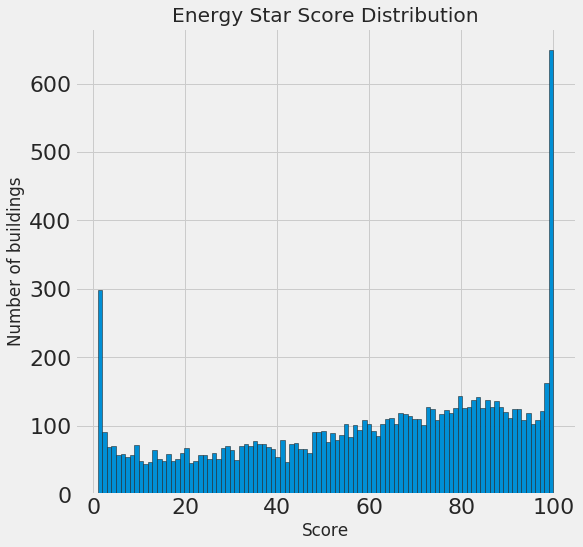

In [188]:
figsize(8, 8)

data = data.rename(columns = {'ENERGY STAR Score': 'score'})

plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins=100, edgecolor='k')
plt.xlabel('Score'); plt.ylabel('Number of buildings');
plt.title('Energy Star Score Distribution'); 

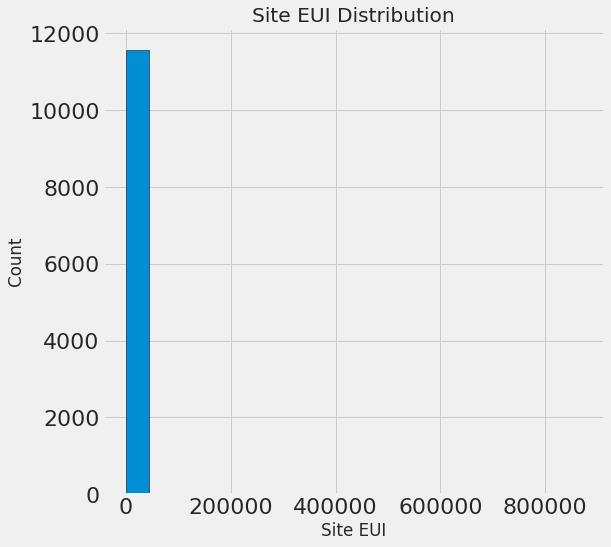

In [189]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20, edgecolor='black');
plt.xlabel('Site EUI'); plt.ylabel('Count');
plt.title('Site EUI Distribution'); 

In [190]:
data['Site EUI (kBtu/ft²)'].describe() 

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [191]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10) 

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [192]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :] 

Order  Property Id Property Name                   Parent Property Id  \
8068   9984      4414323  234 Skillman  Not Applicable: Standalone Property   

                     Parent Property Name BBL - 10 digits  \
8068  Not Applicable: Standalone Property      3028937502   

     NYC Borough, Block and Lot (BBL) self-reported  \
8068                                     3028937502   

     NYC Building Identification Number (BIN) Address 1 (self-reported)  \
8068                        3390250 , 3338313       234 Skillman avenue   

     Postal Code Street Number      Street Name   Borough  \
8068       11211           234  SKILLMAN AVENUE  Brooklyn   

      DOF Gross Floor Area Primary Property Type - Self Selected  \
8068               61811.0                   Multifamily Housing   

     List of All Property Use Types at Property Largest Property Use Type  \
8068                        Multifamily Housing       Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
8068                                            56900.0         2004   

      Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
8068                                    1         90         Whole Building   

     Metered Areas  (Water)  score  Site EUI (kBtu/ft²)  \
8068                    NaN    1.0             869265.0   

      Weather Normalized Site EUI (kBtu/ft²)  \
8068                                939329.0   

      Weather Normalized Site Electricity Intensity (kWh/ft²)  \
8068                                                9.9         

      Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
8068                                             9393.0            

      Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
8068                                  986366.0            4.945919e+10   

      Weather Normalized Site Natural Gas Use (therms)  \
8068                                       534458968.8   

      Electricity Use - Grid Purchase (kBtu)  \
8068                               1983655.6   

      Weather Normalized Site Electricity (kWh)  \
8068                                   563239.6   

      Total GHG Emissions (Metric Tons CO2e)  \
8068                               2627199.1   

      Direct GHG Emissions (Metric Tons CO2e)  \
8068                                2627015.0   

      Indirect GHG Emissions (Metric Tons CO2e)  \
8068                                      184.1   

      Property GFA - Self-Reported (ft²)  \
8068                             56900.0   

      Water Use (All Water Sources) (kgal)  \
8068                                2547.9   

      Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
8068                                          44.78               912801.1   

                Release Date Water Required?  \
8068  05/01/2017 11:34:14 PM             NaN   

     DOF Benchmarking Submission Status   Latitude  Longitude  \
8068                      In Compliance  40.716233  -73.94141   

      Community Board  Council District  Census Tract  \
8068              1.0              34.0         477.0   

                                                    NTA  
8068  East Williamsburg                             ...

In [193]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Using Tusky's method for finding outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
        (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

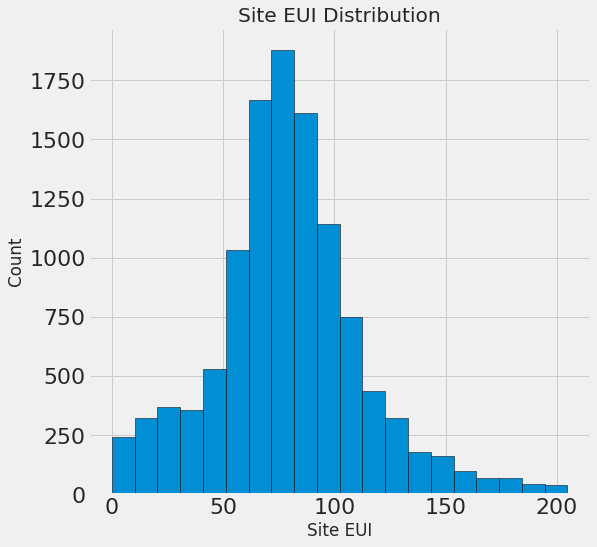

In [194]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution'); 

In [196]:
# buildings with more than 100 customers
types =  data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts() 
types = list(types[types.values > 100].index) 

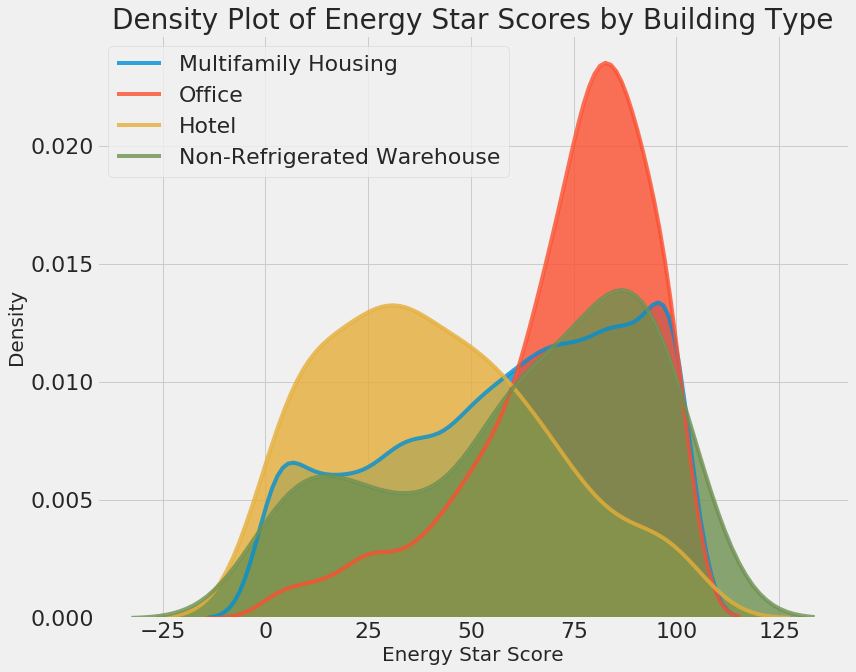

In [197]:
figsize(12, 10)

for b_type in types: 
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores by Building Type
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = True, alpha = 0.8);
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

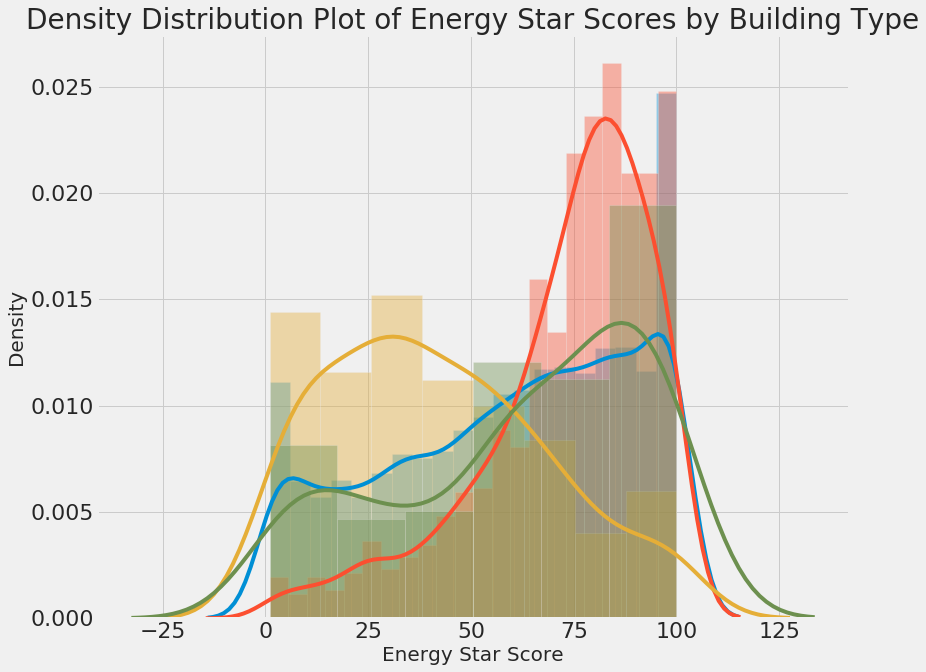

In [198]:
figsize(12, 10)

for b_type in types: 
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Distribution plot of Energy Star scores by Building Type
    sns.distplot(subset['score'].dropna(),kde=True, bins=None); 
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Distribution Plot of Energy Star Scores by Building Type', size = 28);

In [199]:
# boroughs with more than 100 observations
boroughs =  data.dropna(subset=['score']) 
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index) 

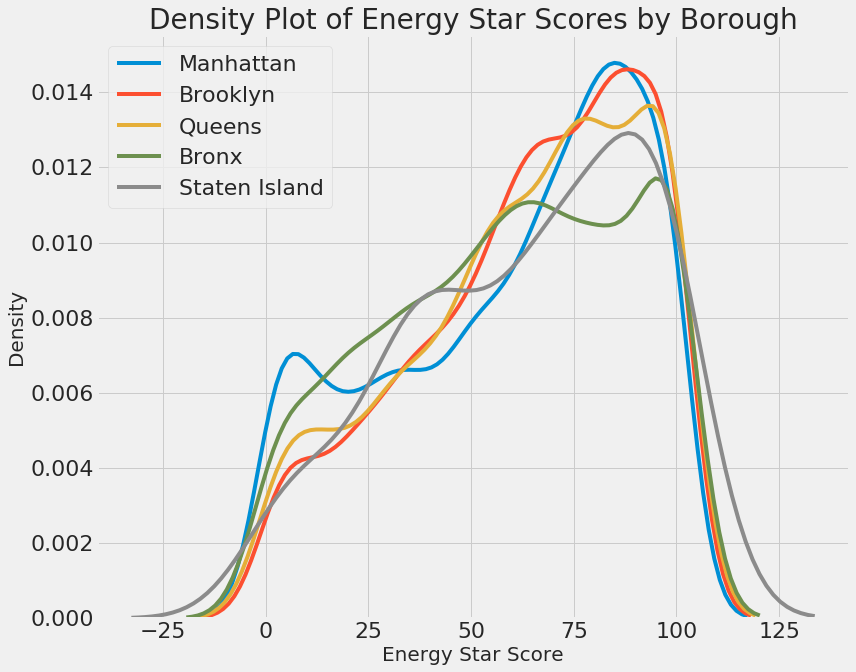

In [201]:
figsize(12, 10)

for borough in boroughs:
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores by Borough 
    sns.kdeplot(subset['score'].dropna(),
               label = borough)
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size= 28); 

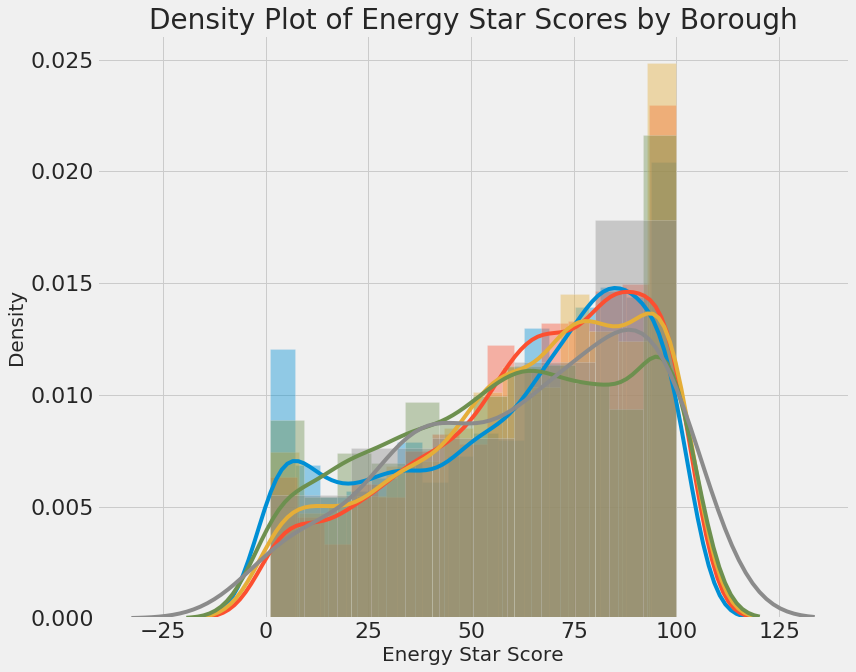

In [202]:
figsize(12, 10)

for borough in boroughs:
    subset = data[data['Borough'] == borough]
    
    # Distribution plot of Energy Star scores using Borough
    sns.distplot(subset['score'].dropna(), kde= True)
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size= 28);

In [203]:
correlations_data = data.corr()['score'].sort_values()
print(correlations_data.head(15), '\n')
print(correlations_data.tail(15)) 

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [204]:
# One Hot encoding feature variables
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
categorical_subset = data[['Borough','Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis=1)
features = features.dropna(subset=['score'])
correlations = features.corr()['score'].dropna().sort_values() 

/home/silas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/silas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/home/silas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


In [205]:
print(correlations.head(15), '\n') 
print(correlations.tail(15)) 

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

/home/silas/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Energy Star Score vs Site EUI')

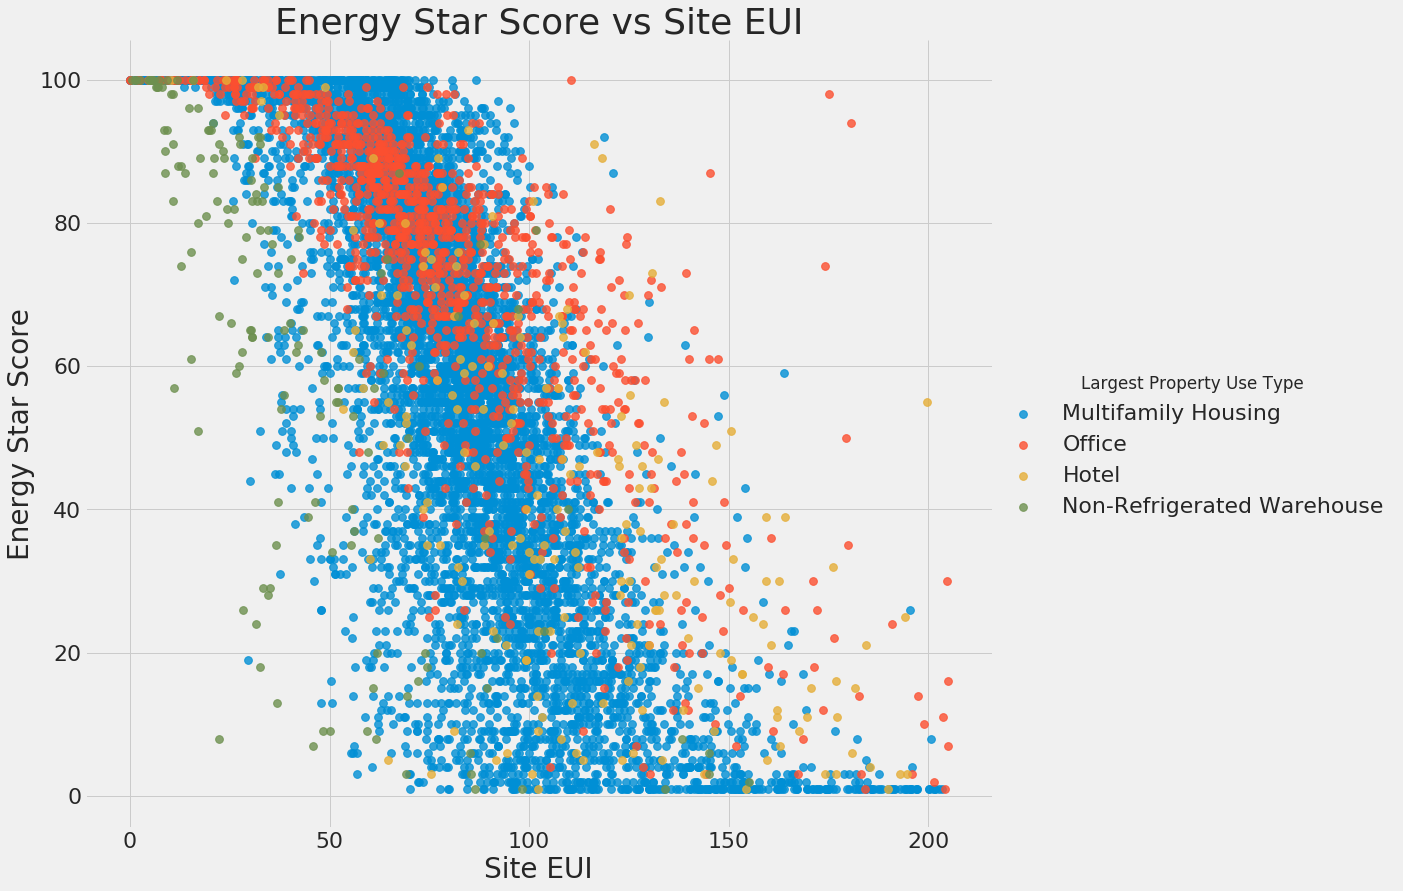

In [206]:
figsize(12, 10)

features['Largest Property Use Type'] = data.dropna(subset=['score'])['Largest Property Use Type']

features = features[features['Largest Property Use Type'].isin(types)]
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

plt.xlabel('Site EUI', size=28) 
plt.ylabel('Energy Star Score', size=28) 
plt.title('Energy Star Score vs Site EUI', size=36)  

In [207]:
features 

Order  Property Id  DOF Gross Floor Area  \
12        15      2637863                   NaN   
18        21      2780056                   NaN   
19        22      4988574              179130.0   
20        23      4988569              102150.0   
21        24      2806486                   NaN   
22        25      4988686              151666.0   
23        26      4988688               64827.0   
30        33      3111973              175885.0   
31        34      3129181              167856.0   
32        35      3129218              217584.0   
33        36      3129231              145056.0   
34        37      3129256              290112.0   
36        39      2658438                   NaN   
40        43      2977473               57300.0   
55        58      2780716              710600.0   
56        59      3114587              710600.0   
59        62      2780735              422915.0   
88        90      2977360               55960.0   
97       100      2746925               93600.0   
100      103      2741415              136608.0   
101      104      2741534              807327.0   
102      105      2741571             1651267.0   
103      106      2741656               84442.0   
114      117      2921191              518647.0   
116      119      2694253             1485916.0   
117      120      2706483             1485916.0   
118      121      2706492             1485916.0   
145      148      2706477                   NaN   
157      160      2809940               59131.0   
159      162      2809941              178897.0   
...      ...          ...                   ...   
11696  14887      2910149              215365.0   
11697  14888      3535903              154860.0   
11700  14893      2787352              408800.0   
11702  14895      2787351              297600.0   
11703  14896      2787332              408800.0   
11704  14901      3417078              238368.0   
11705  14905      4818606               63600.0   
11706  14906      2926168              107800.0   
11709  14913      2800169               78903.0   
11710  14914      4598620              166712.0   
11711  14915      4995662               67424.0   
11713  14925      2630964              352800.0   
11715  14928      2630968              246848.0   
11717  14930      2811573               69442.0   
11721  14946      3076536              124516.0   
11725  14952      3663558              114636.0   
11730  14971      5866122              155282.0   
11731  14973      5866148              169865.0   
11734  14981      4626594                   NaN   
11735  14982      4626608                   NaN   
11736  14983      4950741               59800.0   
11737  14984      4950728               60480.0   
11738  14985      4408791              125526.0   
11739  14986      4408781              162000.0   
11740  14987      4940405               51110.0   
11741  14988      4940453               70645.0   
11742  14989      4940416               93500.0   
11743  14990      4628296                   NaN   
11744  14991      4940464               57824.0   
11745  14993      4952165               60720.0   

       Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
12                                              412503.0         1903   
18                                              321464.0         1939   
19                                              204720.0         1939   
20                                              116744.0         1939   
21                                              189766.0         1911   
22                                              130629.0         1911   
23                                               54913.0         1911   
30                                              175885.0         1973   
31                                              152308.0         1952   
32                                              228570.0         1952   
33                                       

Text(0.5, 1.02, 'Pairs Plot of Energy Data')

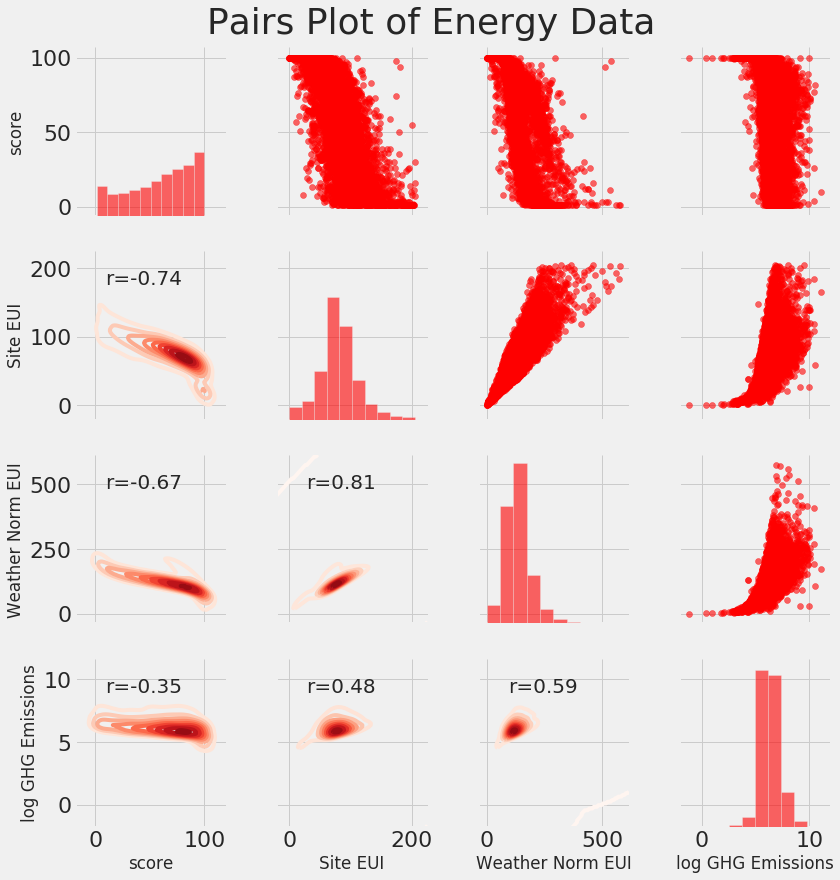

In [208]:
plot_data = features[['score', 'Site EUI (kBtu/ft²)',
                     'Weather Normalized Source EUI (kBtu/ft²)',
                     'log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf:np.nan})

plot_data = plot_data.rename(columns = {
    'Site EUI (kBtu/ft²)' : 'Site EUI',
    'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
    'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'      
})

plot_data = plot_data.dropna()

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate('r={:.2f}'.format(r), xy=(.2, .8), xycoords=ax.transAxes, size = 20)
    
grid = sns.PairGrid(data = plot_data, height=3) 
grid.map_upper(plt.scatter, color='red', alpha=0.6) 
grid.map_diag(plt.hist, color='red', alpha=0.6) 
grid.map_lower(corr_func) 
grid.map_lower(sns.kdeplot, cmap=plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size=36, y=1.02)

In [209]:
features = data.copy()

numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
categorical_subset = data[['Largest Property Use Type', 'Borough']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([categorical_subset, numeric_subset], axis=1)

/home/silas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/silas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


In [210]:
features.shape

(11319, 110)

In [211]:
def remove_collinear_features(x, threshold):
    y = x['score']
    x = x.drop(columns=['score'])
    
#     Correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    
    drop_cols = []
    
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])
                
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    x['score'] = y   
    return x

In [212]:
features = remove_collinear_features(features, 0.6) 

In [213]:
features = features.dropna(axis=1, how='all') 

In [214]:
features.shape

(11319, 66)

In [215]:
# Extract buildings with scores and no score
scores = features[features['score'].notnull()]
no_scores = features[features['score'].isna()]

print(scores.shape)
print(no_scores.shape)

(9461, 66)
(1858, 66)


In [216]:
features = scores.drop(columns=['score'])
targets = pd.DataFrame(scores['score'])

features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into training and test sets
X_training, X_test, y_training, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

print(X_training.shape)
print(X_test.shape) 
print(y_training.shape)
print(y_test.shape)

(6622, 65)
(2839, 65)
(6622, 1)
(2839, 1)


In [217]:
# Developing naive baseline to set benchmark for models to beat
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred)) 

In [218]:
baseline_guess = np.median(y_training)

print("The baseline is a score of %0.2f" % baseline_guess) 
print("Baseline performance on the test set: MAE = %0.4f" % mae(y_training, baseline_guess))

The baseline is a score of 66.00
Baseline performance on the test set: MAE = 24.7084


In [219]:
# Save data
no_scores.to_csv('data/no_scores.csv', index=False)
X_training.to_csv('data/training_features.csv', index=False)
X_test.to_csv('data/test_features.csv', index=False) 
y_training.to_csv('data/training_labels.csv', index=False)
y_test.to_csv('data/testing_labels.csv', index = False)

In [221]:
training_features = pd.read_csv('data/training_features.csv')
training_labels = pd.read_csv('data/training_labels.csv')
testing_features = pd.read_csv('data/test_features.csv')
testing_labels = pd.read_csv('data/testing_labels.csv')

In [222]:
print('Training Features: ',training_features.shape) 
print('Testing Features: ',testing_features.shape) 
print('Training Labels: ', training_labels.shape) 
print('Testing Labels: ', testing_labels.shape) 

Training Features:  (6622, 65)
Testing Features:  (2839, 65)
Training Labels:  (6622, 1)
Testing Labels:  (2839, 1)


In [223]:
training_features.head() 

Largest Property Use Type_Adult Education  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Largest Property Use Type_Automobile Dealership  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Largest Property Use Type_Bank Branch  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Largest Property Use Type_College/University  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Largest Property Use Type_Convenience Store without Gas Station  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Largest Property Use Type_Courthouse  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Largest Property Use Type_Distribution Center  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Largest Property Use Type_Enclosed Mall  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Largest Property Use Type_Financial Office  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Largest Property Use Type_Hospital (General Medical & Surgical)  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Largest Property Use Type_Hotel  Largest Property Use Type_K-12 School  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   Largest Property Use Type_Library  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Largest Property Use Type_Mailing Center/Post Office  \
0                                                  0      
1        

In [224]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median') 
imputer.fit(training_features)

X_train = imputer.transform(training_features) 
X_test = imputer.transform(testing_features) 

/home/silas/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [225]:
print("Missing values in Training Features: ", np.sum(np.isnan(X_train)))
print("Missing values in Testing Features: ", np.sum(np.isnan(X_test))) 

Missing values in Training Features:  0
Missing values in Testing Features:  0


In [226]:
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(X_test))) 

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [229]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

y_train = np.array(training_labels).reshape((-1,))
y_test = np.array(testing_labels).reshape((-1,)) 

In [230]:
# Model evaluation
def fit_and_evaluate(model):
    model.fit(X_train, y_train)
    model_prediction = model.predict(X_test)
    model_mae = mae(y_test, model_prediction)
    return model_mae

In [231]:
# Model selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 

In [232]:
linearRegression = LinearRegression()
linearRegression_mae = fit_and_evaluate(linearRegression)

print("Linear Regression on the test set: MAE = %0.4f" % linearRegression_mae) 

Linear Regression on the test set: MAE = 13.4648


In [233]:
randomForestRegressor = RandomForestRegressor(random_state=60) 
randomForestRegressor_mae = fit_and_evaluate(randomForestRegressor)

print("Random Forest Regressor on the test set: MAE = %0.4f" % randomForestRegressor_mae) 

/home/silas/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regressor on the test set: MAE = 9.9277


In [234]:
gradientBoostRegressor = GradientBoostingRegressor(random_state=60)
gradientBoostRegressor_mae = fit_and_evaluate(gradientBoostRegressor) 

print("Gradient Boosting Regressor on the test set: MAE = %0.4f" % gradientBoostRegressor_mae)  

Gradient Boosting Regressor on the test set: MAE = 9.9653


In [235]:
svm = SVC(C= 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine on the test set: MAE = %0.4f" % svm_mae) 

Support Vector Machine on the test set: MAE = 10.5347


In [236]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn) 

print("K Nearest Neighbor's regression performance on the the set: MAE = %0.4f" %knn_mae) 

K Nearest Neighbor's regression performance on the the set: MAE = 13.0106


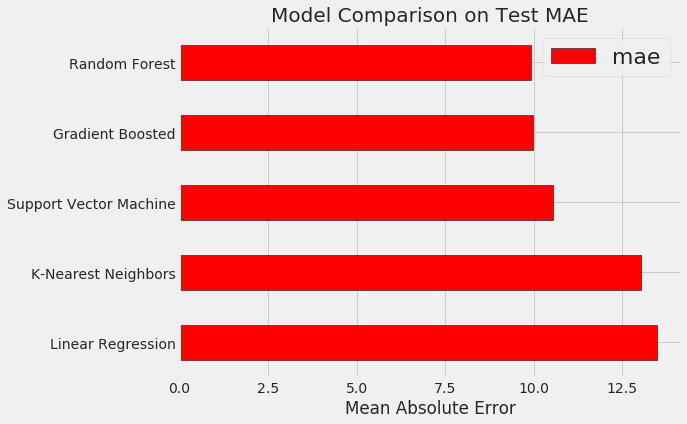

In [237]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Random Forest', 'Gradient Boosted',
                                            'Support Vector Machine','K-Nearest Neighbors'], 
                                 'mae': [linearRegression_mae, randomForestRegressor_mae, gradientBoostRegressor_mae, 
                                         svm_mae, knn_mae]}) 
                                                                                                                                                    
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

In [177]:
loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'log2', 'sqrt', None]

# Definition of the hyperparameter grid
hyperparameter_grid = {
    'n_estmators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_leaf,
    'max_features': max_features
}

In [238]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

model = GradientBoostingRegressor(random_state=42)

random_cv = RandomizedSearchCV(estimator=model, param_distributions=hyperparameter_grid, 
                              cv=4, n_iter=25, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1,
                              return_train_score=True, random_state=42)

random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.7min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [240]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending=False)
random_results.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12      16.545318      0.501533         0.033607        0.002391   
3       13.926257      1.325769         0.040769        0.006809   
9       10.035830      0.314969         0.024044        0.000775   
0        2.175778      0.063663         0.007647        0.001534   
7        8.031484      0.150175         0.024229        0.001852   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
12                500                       6                      6   
3                 500                       6                      8   
9                 500                       4                      2   
0                 100                       2                      6   
7                 500                       4                      6   

   param_max_features param_max_depth param_loss  \
12               None               5        lad   
3                None               5      huber   
9                auto               3      huber   
0                auto               5         ls   
7                auto               3         ls   

                                               params  split0_test_score  \
12  {'n_estimators': 500, 'min_samples_split': 6, ...          -8.811024   
3   {'n_estimators': 500, 'min_samples_split': 6, ...          -8.901543   
9   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.096440   
0   {'n_estimators': 100, 'min_samples_split': 2, ...          -8.974074   
7   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.195949   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
12          -8.815665          -9.315183          -8.976636        -8.979577   
3           -9.075192          -9.375102          -9.063658        -9.103839   
9           -8.942152          -9.411810          -9.145467        -9.148928   
0           -9.051529          -9.418639          -9.192913        -9.159244   
7           -9.130132          -9.663623          -9.356638        -9.336533   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
12        0.204878                1           -7.059243           -6.986658   
3         0.170977                2           -4.698265           -4.352303   
9         0.169280                3           -7.070611           -7.152318   
0         0.169044                4           -7.394232           -7.421563   
7         0.206000                5           -7.229337           -7.142911   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
12           -7.094127           -6.876899         -7.004232         0.083111  
3            -5.123446           -4.387866         -4.640470         0.309619  
9            -6.974199           -7.022914         -7.055011         0.065713  
0            -7.224368           -7.366621         -7.351696         0.076036  
7            -7.077965           -7.146656         -7.149217         0.053718

In [242]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [246]:
trees_grid = {'n_estimators':[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 750, 800]}

model = GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6, min_samples_split=6, random_state=42, max_features=None)

grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=4, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1, return_train_score=True)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  1.9min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='lad', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

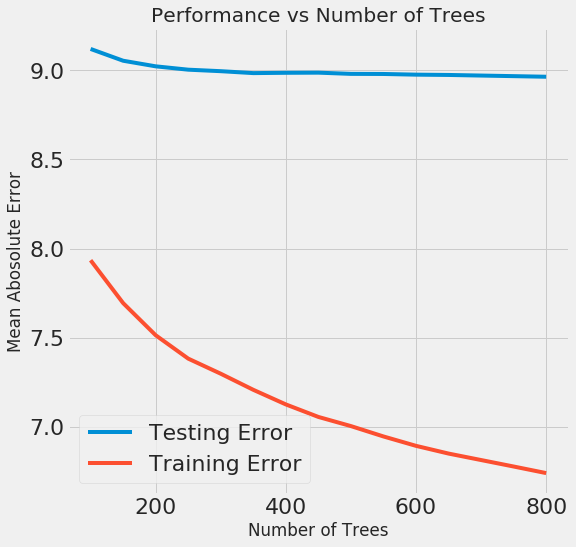

In [247]:
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [248]:
grid_results = results.sort_values('mean_test_score', ascending=False)
grid_results.head(5) 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13      23.376211      1.816602         0.028851        0.006051   
12      28.169314      1.481421         0.045272        0.010713   
11      23.576496      0.227519         0.039575        0.001461   
10      23.213602      0.519730         0.039122        0.002306   
9       19.999914      0.727377         0.039398        0.009937   

   param_n_estimators                 params  split0_test_score  \
13                800  {'n_estimators': 800}          -8.801905   
12                750  {'n_estimators': 750}          -8.808907   
11                650  {'n_estimators': 650}          -8.815241   
10                600  {'n_estimators': 600}          -8.817421   
9                 550  {'n_estimators': 550}          -8.813727   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
13          -8.804910          -9.290287          -8.956915        -8.963456   
12          -8.806364          -9.289067          -8.963045        -8.966798   
11          -8.809022          -9.301796          -8.968027        -8.973473   
10          -8.810529          -9.304847          -8.968075        -8.975169   
9           -8.817696          -9.314859          -8.969809        -8.978973   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
13        0.198796                1           -6.833023           -6.701814   
12        0.196548                2           -6.876719           -6.717777   
11        0.199932                3           -6.917078           -6.810566   
10        0.200444                4           -6.958081           -6.861938   
9         0.203839                5           -7.023131           -6.906431   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
13           -6.849889           -6.577766         -6.740623         0.110120  
12           -6.881120           -6.634591         -6.777552         0.105559  
11           -6.953983           -6.718763         -6.850097         0.092318  
10           -6.974895           -6.778827         -6.893435         0.078965  
9            -7.035464           -6.819296         -6.946080         0.088843

In [260]:
default_model = GradientBoostingRegressor(random_state=42)
final_model = grid_search.best_estimator_
final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [262]:
default_model.fit(X_train, y_train)
default_pred = default_model.predict(X_test)
print("The default model performance on the test set: MAE = %0.4f" % mae(y_test, default_pred))

The default model performance on the test set: MAE = 9.9694


In [263]:
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)
print("The final model performance on the test set: MAE = %0.4f" % mae(y_test, final_pred))

The final model performance on the test set: MAE = 9.0445


Text(0.5, 1.0, 'Test value score against predictions')

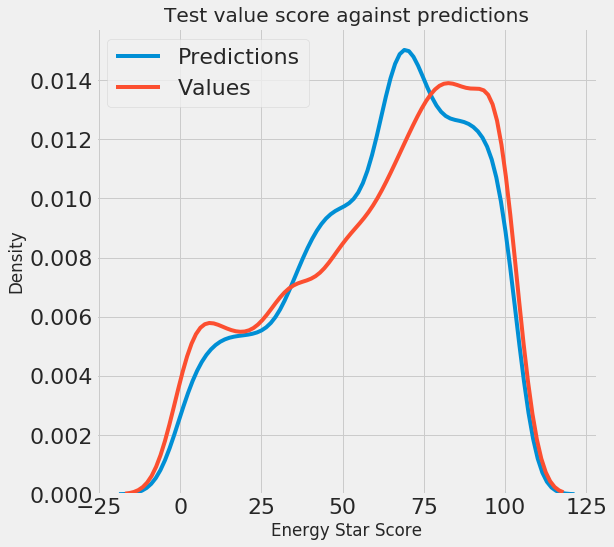

In [264]:
figsize=(8, 8)

sns.kdeplot(final_pred, label='Predictions')
sns.kdeplot(y_test, label='Values')

plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title("Test value score against predictions") 

Text(0.5, 1.0, 'Distribution of Residuals')

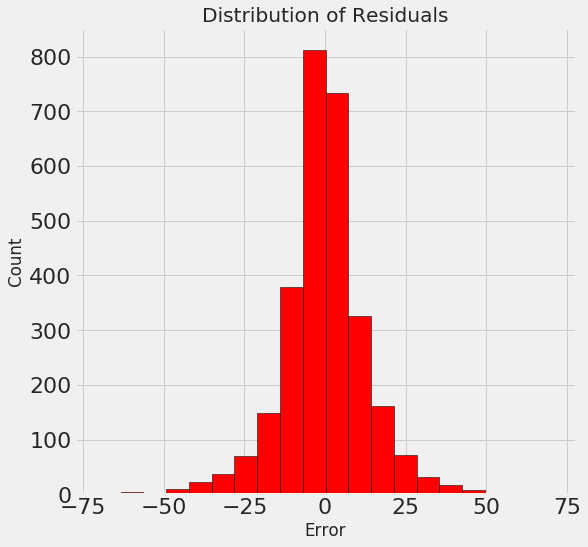

In [265]:
figsize = (6, 6)

residuals = final_pred - y_test
plt.hist(residuals,color='red', edgecolor= 'black', bins=20)
plt.xlabel('Error'); plt.ylabel('Count');
plt.title('Distribution of Residuals') 

In [269]:
feature_results = pd.DataFrame({'feature': list(train_features), 'importance': final_model.feature_importances_})  
feature_results = feature_results.sort_values('importance', ascending=False).reset_index(drop=True) 
feature_results.head(10)  

feature  importance
0                                Site EUI (kBtu/ft²)    0.519749
1  Weather Normalized Site Electricity Intensity ...    0.172245
2                                        Property Id    0.041440
3  Largest Property Use Type_Non-Refrigerated War...    0.037511
4        log_Direct GHG Emissions (Metric Tons CO2e)    0.031702
5                               DOF Gross Floor Area    0.030622
6      Largest Property Use Type_Multifamily Housing    0.029504
7  log_Water Intensity (All Water Sources) (gal/ft²)    0.026674
8                                         Year Built    0.025099
9      Water Intensity (All Water Sources) (gal/ft²)    0.022438

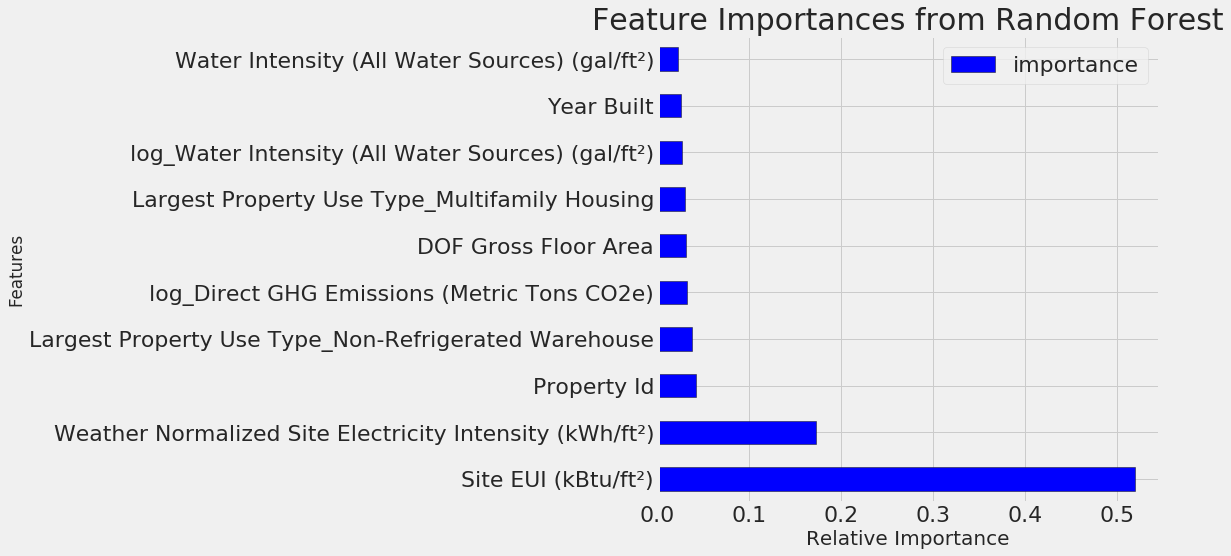

In [272]:
figsize=(12, 10)
plt.style.use('fivethirtyeight')

feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('Features');
plt.title('Feature Importances from Random Forest', size = 30);

In [274]:
most_important_features = feature_results['feature'][:10]

indices = [list(train_features.columns).index(x) for x in most_important_features]
X_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]
                                                                                                                                          
print("Most important training features shape: ", X_reduced.shape) 
print("Most important test features shape: ", X_test_reduced.shape)                      

Most important training features shape:  (6622, 10)
Most important test features shape:  (2839, 10)


In [275]:
linearRegression.fit(X_train, y_train)
linear_regression_prediction = linearRegression.predict(X_test)

linearRegression.fit(X_reduced, y_train)
linear_regression_prediction_reduced = linearRegression.predict(X_test_reduced)

print("Linear Regression Full results : MAE = %0.4f" % mae(y_test, linear_regression_prediction))
print("Linear Regression Reduced results : MAE = %0.4f" % mae(y_test, linear_regression_prediction_reduced))

Linear Regression Full results : MAE = 13.4648
Linear Regression Reduced results : MAE = 14.4016


In [276]:
model_reduced = GradientBoostingRegressor(min_samples_leaf=6, min_samples_split=6, n_estimators=800, random_state=42, max_features=None)

model_reduced.fit(X_reduced, y_train)
model_reduced_prediction = model_reduced.predict(X_test_reduced)

print("The Reduced Gradient Boosting Regressor results: MAE = %0.4f" % mae(y_test, model_reduced_prediction))

The Reduced Gradient Boosting Regressor results: MAE = 9.9410


In [295]:
residuals = abs(model_reduced_prediction - y_test)

wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

Prediction: 23.9029
Actual Value: 96.0000


/home/silas/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.446155e-27
  overwrite_a=True).T


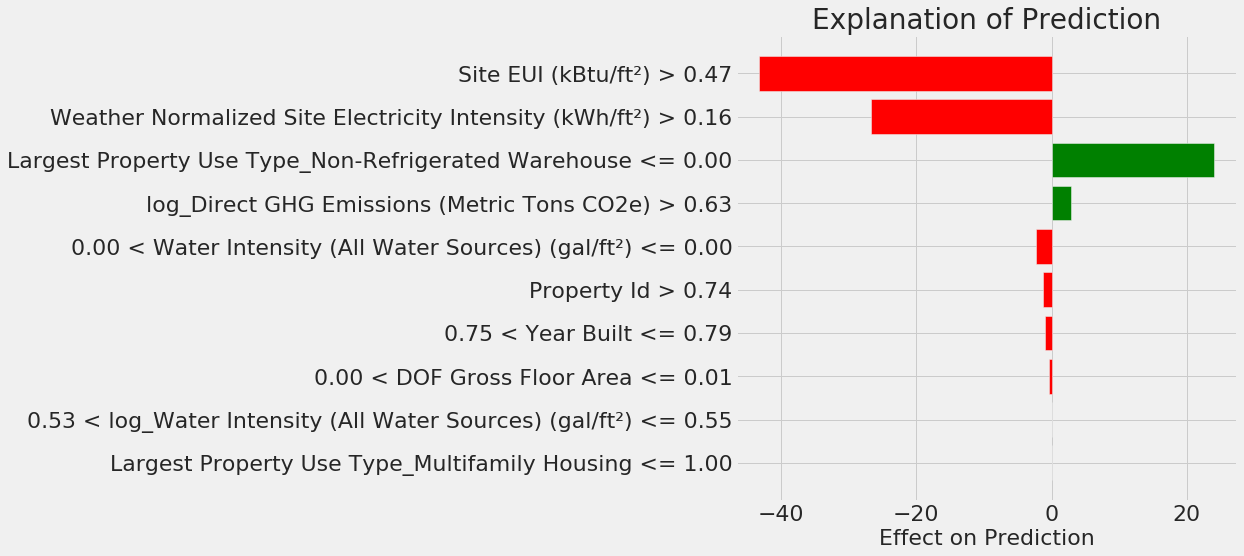

In [302]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_test_reduced, training_labels=y_train, mode='regression', feature_names=list(most_important_features))

print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1))) 
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)]) 

wrong_exp = explainer.explain_instance(data_row = wrong, predict_fn = model_reduced.predict) 

wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [303]:
wrong_exp.show_in_notebook(show_predicted_value=False) 

Prediction: 20.9978
Actual Value: 21.0000


/home/silas/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.725504e-27
  overwrite_a=True).T


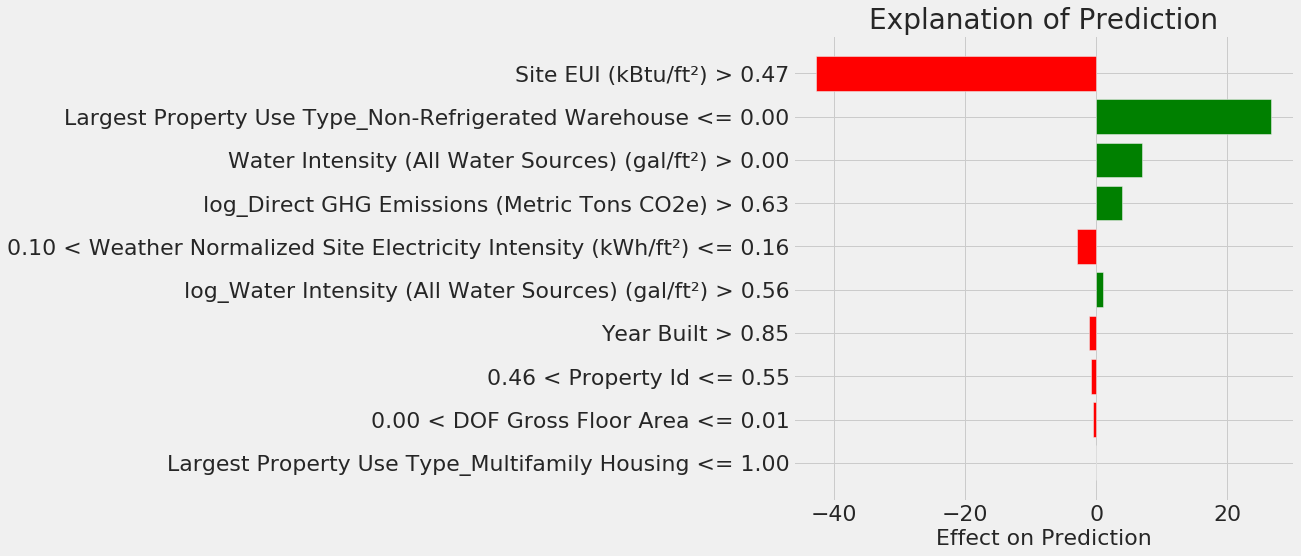

In [304]:
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22); 

In [305]:
right_exp.show_in_notebook(show_predicted_value=False)

In [318]:
from sklearn import tree
import graphviz
# from IPython.display import SVG

single_tree = model_reduced.estimators_[105][0]

tree.export_graphviz(single_tree, rounded=True,out_file='images/tree.dot', feature_names=most_important_features, filled=True) 
graph = graphviz.Source(single_tree) 
# SVG(graph.pipe(format='svg')) 